In [51]:
# Import dependancies
import pandas as pd
import os
import matplotlib.pyplot as plt

# Path to the data files:
path = r"C:\PythonPrograms\spectroscopy\data\Raman\2019.04.19"

In [35]:
for r, d, filenames in os.walk(path):
    print(filenames)

['Calibration Si 532nm 50pc.txt', 'CI-6 532nm 10pc 100-3500nm.wxd', 'CI-6 785nm 50pc 50-3500nm.txt', 'CI-6 785nm 50pc 50-3500nm.wxd', 'CI-6 785nm 50pc 50-500nm.txt', 'inVia20User20Guide.pdf', 'Si 785nm 50pc 50-3500nm.txt', 'Si 785nm 50pc 50-3500nm.wxd', 'Si 785nm 50pc 50-500nm.txt']


In [38]:
txt_files = [os.path.join(path, f) for f in filenames if '.txt' in f]

In [61]:
raman_dict = {}
for f in txt_files:
    raman_dict[f.split('\\')[-1].strip(".txt")] = pd.read_csv(f, sep = '\t', header = None, names = ['raman_shift', 'intensity'])
    
raman_dict
# df = pd.read_csv(txt_files[0], sep = '\t', header = None, names = ['raman_shift', 'intensity'])
# df.head()
# df[['Raman shift, cm-1', 'Intensity']] = df['0'].str.split()

{'Calibration Si 532nm 50pc':      raman_shift  intensity
 0       956.5660  277.75500
 1       955.0900  221.86500
 2       953.6130  247.21200
 3       952.1370  243.76800
 4       950.6590  264.02000
 5       949.1820  248.73000
 6       947.7040  253.74600
 7       946.2260  246.92200
 8       944.7470  262.08200
 9       943.2680  263.71200
 10      941.7890  273.79100
 11      940.3100  282.17500
 12      938.8300  275.35300
 13      937.3490  255.02200
 14      935.8690  214.43900
 15      934.3880  202.57300
 16      932.9070  168.77200
 17      931.4250  165.35900
 18      929.9430  129.89500
 19      928.4610  126.49200
 20      926.9780   94.42550
 21      925.4950   74.17450
 22      924.0120   65.73060
 23      922.5280   43.81040
 24      921.0440   37.06190
 25      919.5600   32.00070
 26      918.0750   52.19980
 27      916.5900   35.35310
 28      915.1050   26.92960
 29      913.6190   28.60620
 ..           ...        ...
 547     102.3810    1.51580
 548     100.7

In [68]:
date = path.split('\\')[-1]

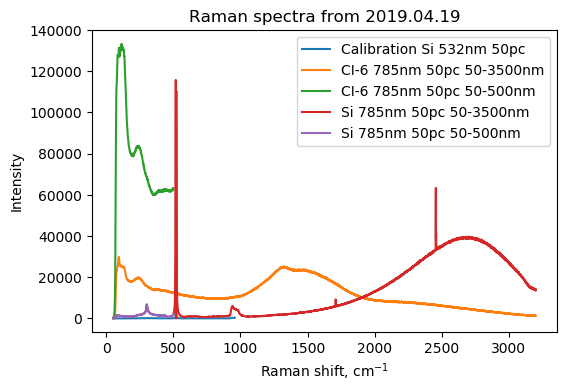

In [76]:
plt.figure(dpi=100)
for key, value in raman_dict.items():
    plt.plot(value['raman_shift'], value['intensity'], label = key)

plt.title(f'Raman spectra from {date}')
plt.xlabel('Raman shift, cm$^{-1}$')
plt.ylabel('Intensity')
plt.legend()